## 2차원 데이터 정리

### 두 데이터 사이의 관계를 나타내는 지표

In [1]:
import numpy as np
import pandas as pd

In [2]:
%precision 3
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
df = pd.read_csv('../data/scores_em.csv',
                index_col = 'student number')

In [4]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english' : en_scores,
                         'mathematics' : ma_scores},
                        index = pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 공분산

In [7]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [8]:
summary_df['product of deviations'].mean()

62.800

In [10]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [11]:
cov_mat[0, 1], cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

In [12]:
cov_mat[0,0], cov_mat[1,1]

(86.0, 68.44000000000001)

In [13]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 상관계수

In [15]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] / \
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [18]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [19]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

### 산점도

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'mathematics')

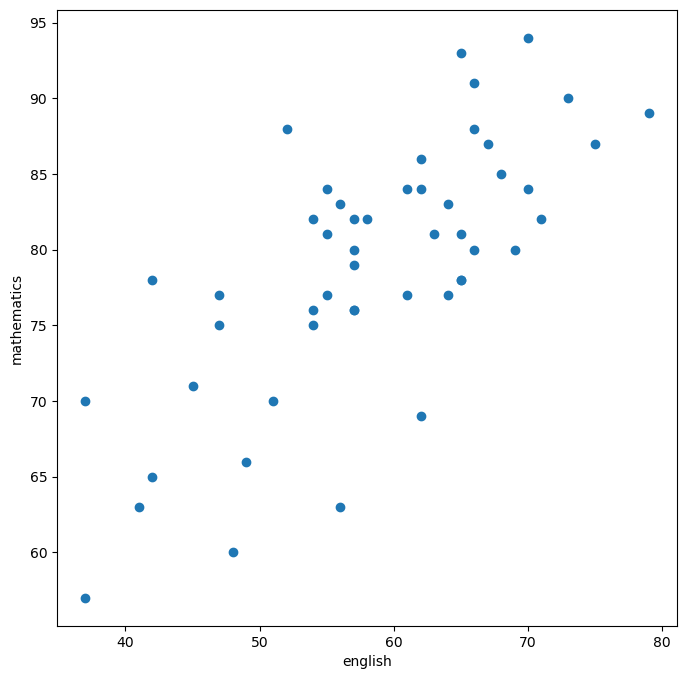

In [21]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')


### 회귀직선

In [25]:
# 계수 b_0와 b_1을 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# b0+b1x를 반환하는 함수를 생성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

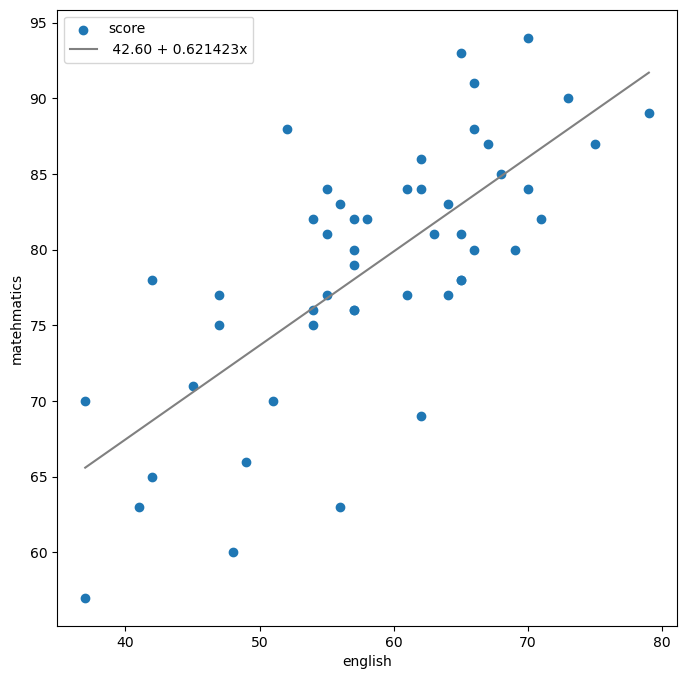

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('matehmatics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color = 'gray',
       label =f'{poly_fit[1] : .2f} + {poly_fit[0]:2f}x')
# 범례의 표시
ax.legend(loc= 'upper left')

plt.show()

### 히트맵

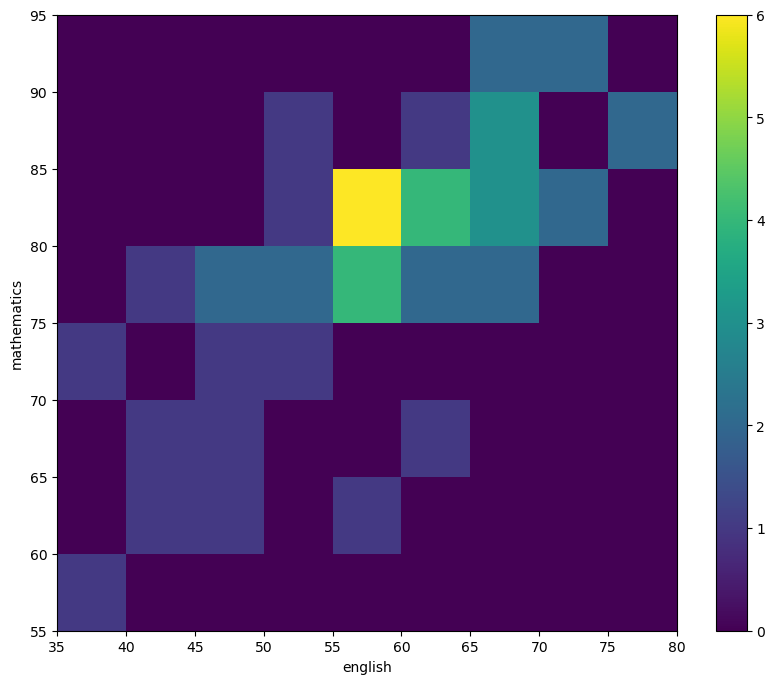

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
             bins=[9,8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax = ax)
plt.show()

### 앤스컴의 예

In [31]:
# npy 형식으로 저장된 Numpy array를 읽음
anscombe_data = np.load('../data/anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [33]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                              'Y_variance', 'X&Y_correlation',
                              'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = \
        [f'{np.mean(dataX):.2f}',
        f'{np.var(dataX):.2f}',
        f'{np.mean(dataY):.2f}',
        f'{np.var(dataY):.2f}',
        f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
        f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


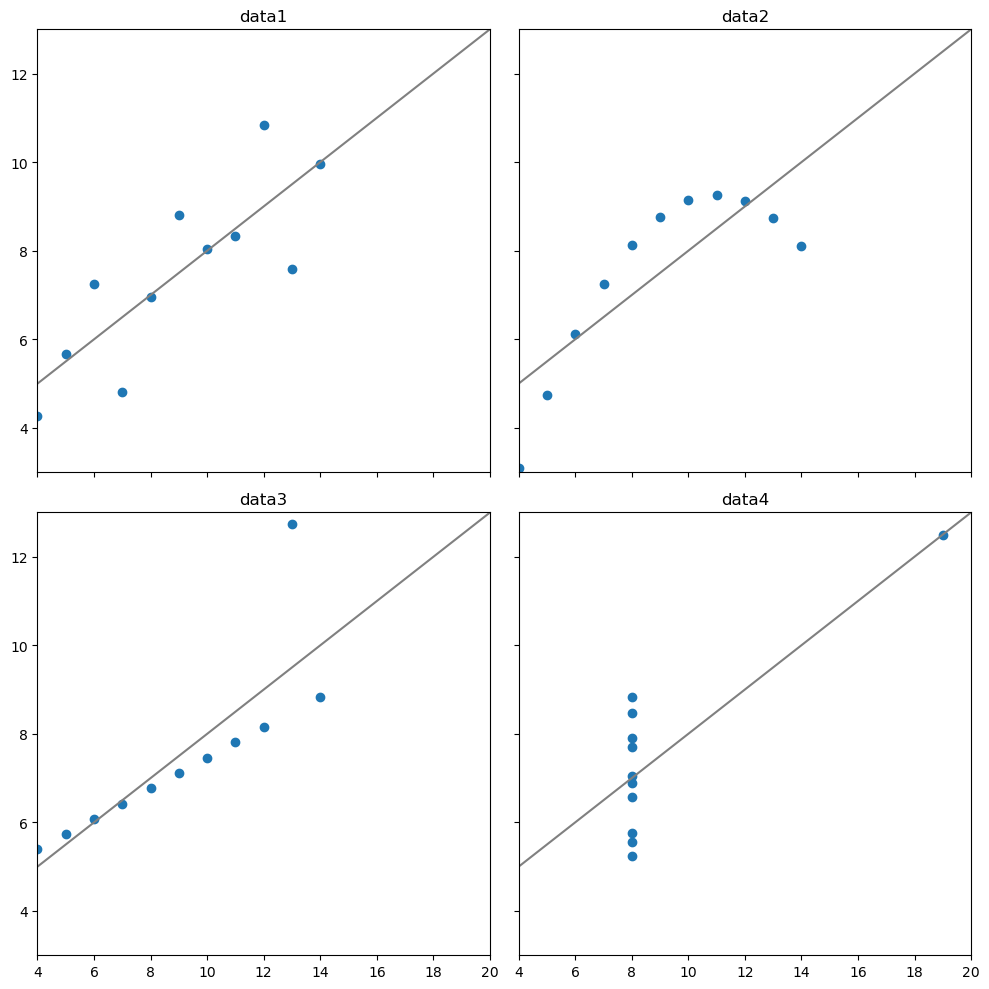

In [38]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10),
                        sharex=True, sharey = True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color = 'gray')
    
#그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()